# Atividade Prática (Continuação): Análise de Objetos no Espaço
### Autor: Sanderson Carlos Ribeiro
***

## Objetivo:
Aplicar os conhecimentos adquiridos no curso para explorar a região de um objeto no espaço
usando dados do Dark Energy Survey (DES).

# PROJETO

## Bibliotecas

In [1]:
# BIBLIOTECAS
import matplotlib.pyplot as plt # Para os gráficos
import pandas as pd
import numpy as np

# !pip install astropy # (execute se não tiver instalado o astropy - o símbolo ! serve para usar o pip dentro do ambiente jupyter notebook)
from astropy import units as u
from astropy.coordinates import SkyCoord

# !pip install dblinea # (execute se não tiver instalado o dblinea)
from dblinea import DBBase

%reload_ext autoreload
%autoreload 2

## Lendo o Arquivo CSV

É fácil ver que a leitura do arquivo CSV funcionou. Basta abrirmos o arquivo CSV e comparar com os dados da Tabela abaixo.

In [2]:
# Lendo o arquivo CSV dos dados (Retângulo)
data1 = pd.read_csv("Dados_CartwheelGalaxyRectangle.csv")

# Exibindo as primeiras linhas do arquivo
data1.head() # Primeiros 5 linhas de dados apenas

,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i
0,1083233115,8.903303,-34.192051,2,17.879395,16.674522,16.257225,0.000783,0.000364,0.000379
1,1083233647,8.902043,-34.189657,0,25.366838,24.550381,24.269382,0.250888,0.159499,0.230430
2,1083233351,8.905861,-34.186896,0,24.855618,24.986763,25.513369,0.217783,0.320519,0.954277
3,1083233747,8.908578,-34.190648,0,25.208752,24.304001,23.731756,0.224688,0.121410,0.137622
4,1083233505,8.933983,-34.188525,0,25.905296,25.928194,24.846287,0.296523,0.396488,0.268696


In [3]:
# Lendo o arquivo CSV dos dados (Circulo)
data2 = pd.read_csv("Dados_CartwheelGalaxyCircle.csv")

# Exibindo as primeiras linhas do arquivo
data2.head() # Primeiros 5 linhas de dados apenas

,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i
0,1083232979,9.245211,-34.183172,0,23.839706,23.619831,23.437641,0.077145,0.082664,0.124732
1,1083232625,9.250448,-34.179208,0,27.973959,24.978254,25.099403,3.571857,0.298401,0.595661
2,1083232493,9.234036,-34.177755,0,24.859114,24.506134,24.411049,0.128408,0.121752,0.199331
3,1083232001,9.224144,-34.172271,0,24.293543,22.927771,21.489794,0.129328,0.050474,0.023239
4,1083231852,9.224597,-34.170778,0,25.451180,25.340595,24.931129,0.200842,0.237049,0.293737


## Gráficos

CPU times: user 214 ms, sys: 176 ms, total: 391 ms
Wall time: 360 ms


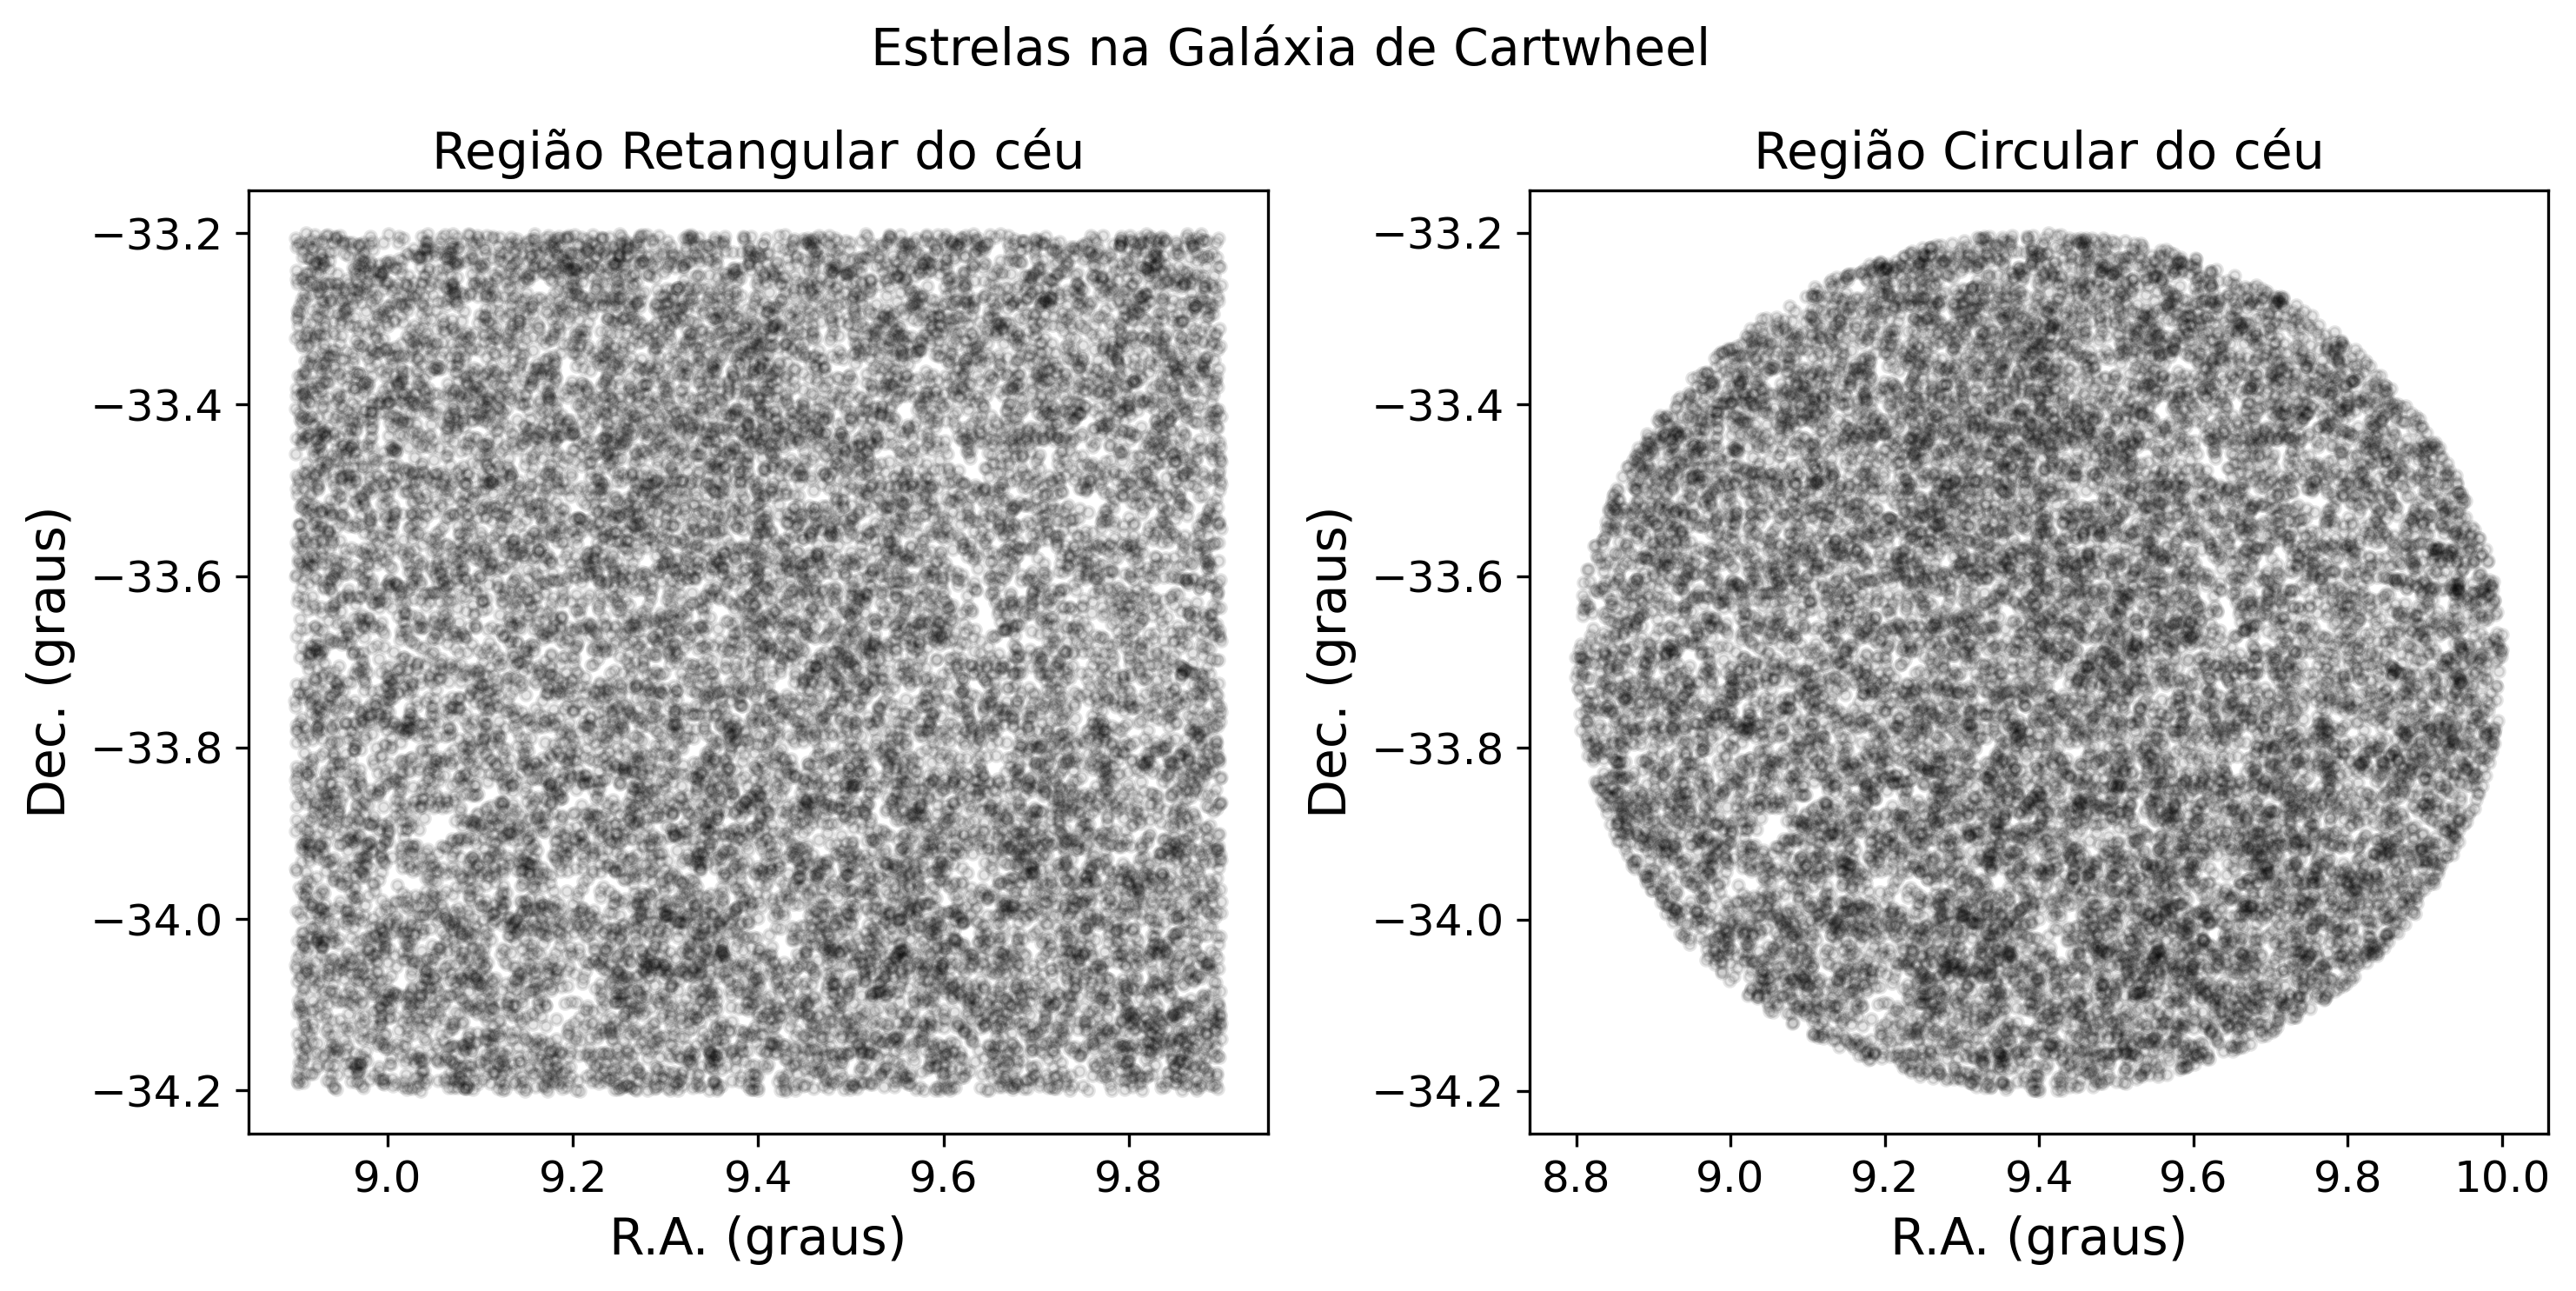

In [4]:
%%time 
# comando específico do Jupyter Notebook. Mede o tempo de execução do bloco de código. Ao final da execução é mostrado na tela o tempo em questão.
plt.figure(figsize=[10,5], dpi=300) # Cria uma figura para os gráficos com tamanho em polegadas (10 de largura e 5 de altura) e com resolução de 300 DPI (300 pixels por polegada).
plt.suptitle("Estrelas na Galáxia de Cartwheel", fontsize=14) # Adiciona um título principal com tamanho de fonte igual a 14.

# Primeiro gráfico (à esquerda)
plt.subplot(1,2,1) # Divide a figura em uma grade de 1 linha e 2 colunas, e ativa a primeira célula (1) para plotar o primeiro gráfico.
plt.plot(data1.ra, data1.dec, 'k.', alpha=0.1) # Plota os dados do conjunto data1 usando as colunas de Ascensão Reta (ra) e Declinação (dec). O argumento k. define as estrelas como pontos pretos e alpha=0.1 define a transparência dos pontos, tornando-os mais claros.
plt.title("Região Retangular do céu", fontsize=14) # Título do gráfico individual.
plt.xlabel("R.A. (graus)", fontsize=14) # Define o eixo x com rótulo referente a Ascensão Reta em graus e fonte da letra em tamanho 14.
plt.ylabel("Dec. (graus)", fontsize=14) # Define o eixo y com rótulo referente a Declinação em graus e fonte da letra em tamanho 14.
plt.xticks(fontsize=12) # Define o tamanho da fonte para os números do eixo x.
plt.yticks(fontsize=12) # Define o tamanho da fonte para os números do eixo y.

# Segundo gráfico (à direita)
plt.subplot(1,2,2) # Ativa a segunda célula (2) da grade para plotar o segundo gráfico (de região circular).
plt.plot(data2.ra, data2.dec, 'k.', alpha=0.1) # Mesmo processo já mencionado só que para o conjunto de dados de uma região circular do céu.
plt.title("Região Circular do céu", fontsize=14)
plt.xlabel("R.A. (graus)", fontsize=14)
plt.ylabel("Dec. (graus)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout() # Ajusta automaticamente os espaços entre os subgráficos para evitar sobreposição.

Nestes gráficos vemos um plot de pontos individuais devido ao uso do ``plt.plot``. Vemos duas visualizações distintas da distribuição de estrelas de uma porção do céu voltada para a Galáxia de Cartwheel. As áreas mais densas dos gráficos são regiões em que há um acúmulo maior de estrelas, enquanto que as áreas menos densas são locais com menor número de estrelas. 

## Mapa de Densidades

Usado para destacar claramente as áreas mais e menos densas dos gráficos anteriores.

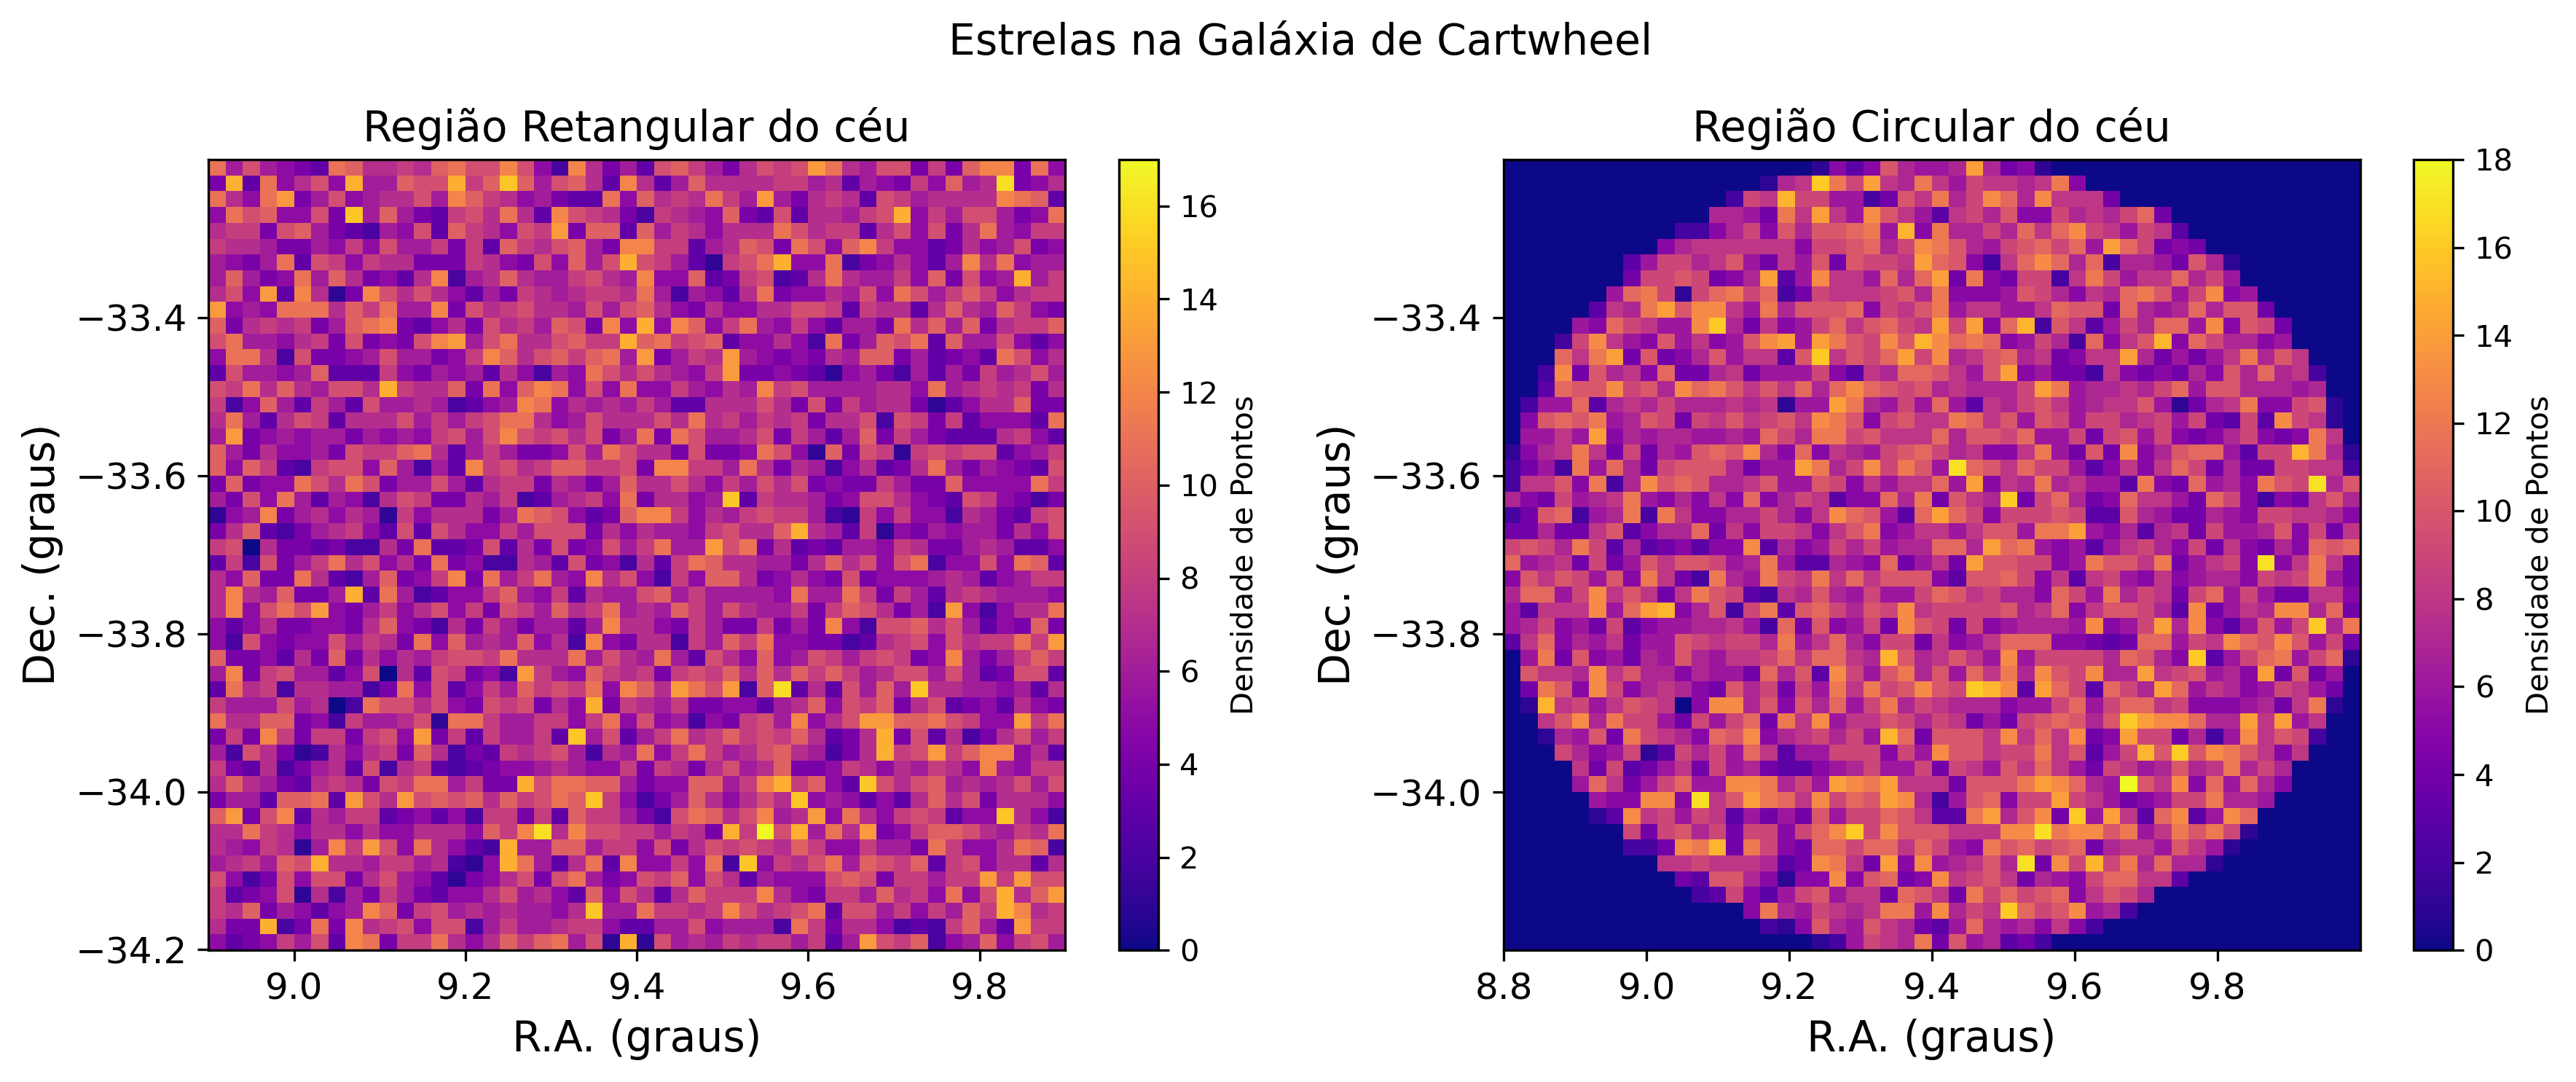

In [5]:
## %%time
plt.figure(figsize=[12,5], dpi=300)
plt.suptitle("Estrelas na Galáxia de Cartwheel", fontsize=14)

# Primeiro gráfico (à esquerda)
plt.subplot(1,2,1)
plt.hist2d(data1.ra, data1.dec, bins=50, cmap="plasma") # Cria um gráfico de densidade em duas dimensões (2D histogram) para os dados. Sendo que o parâmetro bins=50 divide o plano em uma grade de 50x50 células (bins) para calcular a densidade de pontos em cada célula que é colorida de acordo com o número de pontos (estrelas) nela, representando a densidade. O parâmetro cmap="plasma" muda a cor dos gráficos.
plt.title("Região Retangular do céu", fontsize=14)
plt.xlabel("R.A. (graus)", fontsize=14)
plt.ylabel("Dec. (graus)", fontsize=14)
plt.colorbar(label="Densidade de Pontos") # Adiciona uma barra de cores, rotulada como Densidade de Pontos, ao lado do gráfico para representar a escala de densidade.
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Segundo gráfico (à direita)
plt.subplot(1,2,2)
plt.hist2d(data2.ra, data2.dec, bins=50, cmap="plasma")
plt.title("Região Circular do céu", fontsize=14)
plt.xlabel("R.A. (graus)", fontsize=14)
plt.ylabel("Dec. (graus)", fontsize=14)
plt.colorbar(label="Densidade de Pontos") 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

Neste gráfico, diferentemente do gráfico anterior, vemos um histograma 2D, que agrupa os dados em células para mostrar a densidade de pontos. Neste sentido as áreas com mais estrelas aparecem mais brilhantes ou coloridas enquanto que áreas menos densas (com menor quantidade de estrelas) aparecem mais escuras ou com outra tonalidade. Essa característica fica evidente quando visualizamos o gráfico com a barra de densidade de pontos ao lado do mesmo. Note que a quantidade de pontos (estrelas) aumenta a medida que a cor da barra vai do tom mais escuro para o mais claro.

In [6]:
# Para ver os nomes das cores disponíveis para o parâmetro cmap dos gráficos de densidade
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

## Gráfico Diagrama Cor-Magnitude (CMD - *Color-Magnitude Diagram*)

O CMD se trata de uma ferramenta fundamental para se estudar as propriedades físicas e evolutivas de estrelas, pois relaciona a **magnitude absoluta** (brilho intrínseco da estrela) de estrelas com a sua **cor** (que indica a sua temperatura superficial).

Ele é muito relacionado ao Diagrama de Hertzsprung-Russell (H-R). A diferença entre ambos está no fato de que o H-R usa a temperatura no eixo horizontal do gráfico, enquanto que o CMD usa a cor como *proxy* para a temperatura.

**Algumas informações que o CMD pode nos fornecer:** Estudo da evolução estelar, estimativa da idade de estrelas, estimativa da metalicidade e a distribuição de populações estelares.

Por conveniência vamos plotar o CMD para o conjunto de dados da região circular do céu.

In [7]:
dadosCMD = data2
del data1   # limpando da memória os dataframes
del data2  # que não vamos mais utilizar 

In [8]:
dadosCMD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16197 entries, 0 to 16196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coadd_object_id   16197 non-null  int64  
 1   ra                16197 non-null  float64
 2   dec               16197 non-null  float64
 3   flags_g           16197 non-null  int64  
 4   mag_auto_g_dered  16197 non-null  float64
 5   mag_auto_r_dered  16197 non-null  float64
 6   mag_auto_i_dered  16197 non-null  float64
 7   magerr_auto_g     16197 non-null  float64
 8   magerr_auto_r     16197 non-null  float64
 9   magerr_auto_i     16197 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.2 MB


In [9]:
dadosCMD.head()

,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i
0,1083232979,9.245211,-34.183172,0,23.839706,23.619831,23.437641,0.077145,0.082664,0.124732
1,1083232625,9.250448,-34.179208,0,27.973959,24.978254,25.099403,3.571857,0.298401,0.595661
2,1083232493,9.234036,-34.177755,0,24.859114,24.506134,24.411049,0.128408,0.121752,0.199331
3,1083232001,9.224144,-34.172271,0,24.293543,22.927771,21.489794,0.129328,0.050474,0.023239
4,1083231852,9.224597,-34.170778,0,25.451180,25.340595,24.931129,0.200842,0.237049,0.293737


Cálculo da cor _BP-RP_ (nova coluna no _dataframe_ **dados**). A diferença entre BP (*Blue Photometric*) e RP (*Red Photometric*) [BP-RP] é usada para medir a cor de um objeto celeste. É equivalente ao conceito de diferença de magnitude de cor (g-r) [g de *green* e r de *red*].

In [10]:
dadosCMD["bp_rp"] = dadosCMD.mag_auto_g_dered - dadosCMD.mag_auto_r_dered 

In [11]:
dadosCMD.head() # Com a inclusão de uma nova coluna referente ao resultado da subtração acima

,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i,bp_rp
0,1083232979,9.245211,-34.183172,0,23.839706,23.619831,23.437641,0.077145,0.082664,0.124732,0.219875
1,1083232625,9.250448,-34.179208,0,27.973959,24.978254,25.099403,3.571857,0.298401,0.595661,2.995705
2,1083232493,9.234036,-34.177755,0,24.859114,24.506134,24.411049,0.128408,0.121752,0.199331,0.352980
3,1083232001,9.224144,-34.172271,0,24.293543,22.927771,21.489794,0.129328,0.050474,0.023239,1.365772
4,1083231852,9.224597,-34.170778,0,25.451180,25.340595,24.931129,0.200842,0.237049,0.293737,0.110584


Limpeza da amostra: vamos selecionar apenas estrelas com fotometria de boa qualidade na banda _g_ (`flags_g < 4`) e com medidas bem sucedidas nas magnitudes ($mag \neq 99.$) . 

In [12]:
dadosCMD.query("flags_g < 4  & mag_auto_g_dered != 99. & mag_auto_r_dered != 99. & mag_auto_i_dered != 99. ", inplace=True)

In [13]:
dadosCMD.count() # Contagem do número de dados para cada coluna

coadd_object_id     15382
ra                  15382
dec                 15382
flags_g             15382
mag_auto_g_dered    15382
mag_auto_r_dered    15382
mag_auto_i_dered    15382
magerr_auto_g       15382
magerr_auto_r       15382
magerr_auto_i       15382
bp_rp               15382
dtype: int64

In [14]:
dadosCMD.describe() # Alguns sumários e/ou dados estatísticos referente aos dados

,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i,bp_rp
count,1.538200e+04,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000
mean,1.084812e+09,9.404260,-33.702853,0.244247,24.778562,24.027573,23.705732,0.687407,0.277206,0.424013,0.750990
std,2.497189e+06,0.295793,0.253810,0.765935,2.026561,2.032493,2.221546,8.442446,2.054797,1.680280,0.786238
min,1.083204e+09,8.799391,-34.199851,0.000000,15.007527,15.519863,15.538724,0.000227,0.000213,0.000249,-5.849333
25%,1.083284e+09,9.171185,-33.911368,0.000000,24.266434,23.475363,22.824304,0.123480,0.083546,0.086995,0.252305
50%,1.083312e+09,9.404034,-33.707902,0.000000,25.203722,24.702340,24.497443,0.233793,0.192763,0.296327,0.626642
75%,1.088534e+09,9.638802,-33.492845,0.000000,25.888135,25.262853,25.114193,0.410768,0.296788,0.471724,1.252732
max,1.089062e+09,9.999794,-33.200483,3.000000,34.071743,31.958735,31.336166,528.002075,158.809464,158.831360,8.043285


### Plot do Gráfico CMD

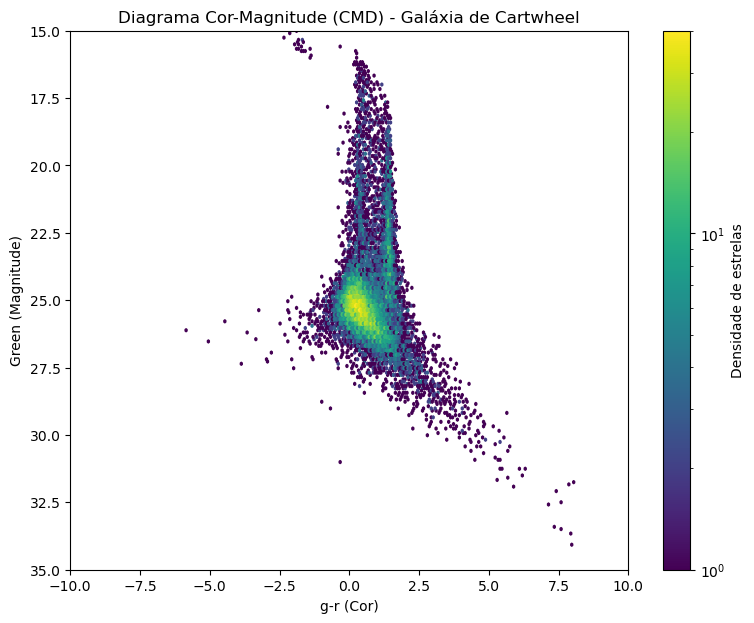

In [15]:
plt.figure(figsize=(9, 7)) # Cria uma figura para definir o espaço em que será desenhado o gráfico
plt.hexbin(dadosCMD.bp_rp, dadosCMD.mag_auto_g_dered, gridsize=200, bins='log') # Plota um gráfico de densidade hexagonal, que divide o espaço do gráfico em células hexagonais. Ajuste gridsize para aumentar o número de hexágonos e assi a resolução do gráfico.
plt.gca().invert_yaxis()  # Inverte o eixo y, pois magnitudes maiores (números maiores) correspondem a estrelas mais fracas, enquanto magnitudes menores (números menores) correspondem a estrelas mais brilhantes.
plt.xlabel('g-r (Cor)')
plt.ylabel('Green (Magnitude)')
plt.title('Diagrama Cor-Magnitude (CMD) - Galáxia de Cartwheel')
#plt.xlim(-0.5,1.5)
plt.ylim(35,15) # Limita o eixo da magnitude
plt.xlim(-10, 10)  # Limita o eixo de cor
plt.colorbar(label='Densidade de estrelas')
plt.show()

Esse gráfico nos diz que na região circular do céu voltada para a Galáxia de Cartwheel vemos uma grande população de estrelas com maior temperatura no intervalo de 0 a 2 de g-r.